# 기계학습 중간고사 대체 레포트


**문제안내**
 - 본 레포트는 1) 기대수명 예측문제 2) 숫자이미지 예측문제 두 가지 문제를 회귀와 분류로 각각 풀어보는데 목적이 있습니다. 1)기대수명 예측문제는 회기로 풀어야 할 문제로 보이나 분류로도 풀 수 있습니다. 반대로 2) 숫자이미지 예측문제도 분류문제로 보이나 회기 문제로 풀 수 있습니다. 2가지 문제를 회기와 분류 2가지 방법으로 풀어보고, 회기와 분류가 어떤 역할을 하고 어떤 문제에 적용해야 하는지에 대해 이해하면 좋겠습니다. 아래 안내를 참조해서 각 문제를 코딩하고 결과를 실험정리/분석 문서에 작성해서 제출해 주세요.

**풀어야 할 문제**
 1. 기대수명 예측하기 (회기/분류)
 2. 숫자이미지 예측하기 (회기/분류) 

**제출해야 할 것**: 소스코드 (ipynb파일) + 실험정리/분석 문서 (pdf)

**제출마감일**: 4월 29일 오후 5시

**제출포맷**
 1. 소스코드: ipynb 파일로 제출. 컴파일한 결과가 출력된 상태로 제출해야 합니다. 중간 결과가 출력되도록 코드를 작성하는 것을 추천합니다.
 2. 실험정리/분석 문서: pdf 파일로 제출. 실험결과는 테이블 형태로 정리해야 하며 분석은 줄글로 작성 가능합니다. 

**소스코드**
- 소스코드는 주석이 있는 것이 좋으며, 중간중간 결과를 출력해 보는 것을 추천합니다. [문제1]~[문제5] 부분에 여러분들이 직접 코딩을 한 후 ipynb 파일을 제출하면 됩니다.

**실험정리/분석 문서**
1. [문제1]~[문제5]의 결과를 테이블 하나에 정리하세요. 배점 10점
2. [문제1]~[문제4]를 분석하세요. 회기(linear regression)이 분류(knn)에 비해 1)기대수명 예측 2)숫자이미지 예측 중 어떤 문제를 더 잘푸는지 분석하고, 왜 더 잘푸는지 설명하세요. 또한 분류(knn)이 회기(linear regression)에 비해 어떤 문제를 더 잘푸는지 분석하고, 그 이유를 설명하세요. 배점 20점 




# 수명데이터 예측하기 

data load

In [4]:
import pandas as pd

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.dropna(inplace = True)

X = life[['Alcohol', 'Percentage expenditure', 'Polio',
         'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

학습데이터 테스트데이터 나누기

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

[문제1] 회기로(linear_regression) 수명 예측하기. 배점 10점

In [33]:
### [code] sklearn의 LinearRegression함수로 X_train을 학습하고 X_test의 수명을 예측하는 코드 만들기
from sklearn.linear_model import LinearRegression

# X_train으로 학습
model = LinearRegression()
model.fit(X_train, y_train)

# X_test에 대해 predict한 값 = y_test_hat
y_test_hat = model.predict(X_test)

In [4]:
### [code] 예측한 X_test의 수명과 정답 y_test를 비교하여 mean square error 구하기
from sklearn.metrics import mean_squared_error

# 예측한 X_test의 수명 = y_test_hat, 정답 = y_test를 비교해 mse를 구한다.
mse = mean_squared_error(y_test_hat, y_test)
mse

43.18840066091893

[문제2] 분류로(knn) 수명 예측하기. 배점 15점

sklearn의 knn함수는 default 하이퍼파라미터를 사용해야 합니다. 즉, 학습데이터와 레이블 이외에 하이퍼파라미터는 직접설정하지 말고 기본 값을 사용하도록 하세요.

In [31]:
### [code] sklearn의 knn함수로 X_train을 학습하고 X_test의 수명을 예측하는 코드 만들기
### knn을 학습하기 위해서 y_train를 반올림하여 정수형태로 type-casting해야 함. 즉 기대수명을 소수점이 있는 81.72세가 아니라 반올림한 정수 82세로 바꿔야 함. 따라서 1세 단위로 class가 구분되는 것임. 
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

# X_train과 y_train 데이터를 numpy로 변경하고 y_train 데이터는 labels의 역할을 해야 하므로 반올림하여 정수로 바꾼다.
X_train_ = X_train.to_numpy()
y_train_ = y_train.apply(lambda x:round(x)).to_numpy()

X_test_ = X_test.to_numpy()
y_test_ = y_test.apply(lambda x:round(x)).to_numpy()

# train and predict
model.fit(X_train_, y_train_)
y_test_hat_ = model.predict(X_test_)

In [6]:
### [code] 예측한 X_test의 수명과 정답 y_test를 비교하여 mean square error 구하기
### k=1,3,5 일 때 각각의 accuracy성능을 구해야 함

for k in [1, 3, 5]:
    # Knn classifier with parameter k
    model = KNeighborsClassifier(n_neighbors=k)
    
    # train
    model.fit(X_train_, y_train_)
    
    # predict
    y_test_hat_ = model.predict(X_test_)
    
    # mse
    mse = mean_squared_error(y_test_hat_, y_test_)
    print(F"KNN MSE with k = {k}: {mse}")

KNN MSE with k = 1: 61.42727272727273
KNN MSE with k = 3: 102.7060606060606
KNN MSE with k = 5: 105.24242424242425


#MNIST 숫자 이미지 예측하기

 MNIST dataset load

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X /= 255.0

데이터 확인하기

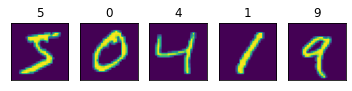

In [26]:
import matplotlib.pyplot as plt
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].values.reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)
plot_example(X, y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

[문제3] 분류로(KNN) 숫자 분류하기. 배점 10점

sklearn의 knn함수는 default 하이퍼파라미터를 사용해야 합니다. 즉, 학습데이터와 레이블 이외에 하이퍼파라미터는 직접설정하지 말고 기본 값을 사용하도록 하세요.

In [28]:
### [code] sklearn의 KNeighborsClassifier함수로 X_train을 학습하고 X_test의 레이블을 예측하는 코드 만들기
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)

In [29]:
### [code] 예측한 X_test 레이블의 accuracy(예측결과가 정답과 일치한 샘풀 숫자 / 전체 샘플 숫자) 구하기 (sklearn 이용가능)
### k=1,3,5 일 때 각각의 accuracy성능을 구해야 함
from sklearn.metrics import accuracy_score

for k in [1, 3, 5]:
    # Knn classifier with parameter k
    model = KNeighborsClassifier(n_neighbors=k)
    
    # train
    model.fit(X_train, y_train)
    
    # predict
    y_test_hat = model.predict(X_test)
    
    # accuracy    
    print(F"KNN accuracy with k = {k}: {accuracy_score(y_test, y_test_hat)}")

KNN accuracy with k = 1: 0.9703571428571428
KNN accuracy with k = 3: 0.9717857142857143
KNN accuracy with k = 5: 0.9693571428571428


[문제4] 회기로(linear_regression) 숫자 분류하기. 배점 15점

In [34]:
### [code] sklearn의 LinearRegression함수로 X_train을 학습하고 X_test의 레이블을 예측하는 코드 만들기

# Linear Regression 
model = LinearRegression()

# train
model.fit(X_train, y_train)

y_test_hat = model.predict(X_test)

In [35]:
### [code] 예측한 X_test 레이블의 accuracy(예측결과가 정답과 일치한 샘풀 숫자 / 전체 샘플 숫자) 구하기 (sklearn 이용가능)
### 이 때 예측결과는 반올림하여 정수로 type-casting해야 함
import numpy as np

# y_test_hat의 예측 결과 반올림
y_test_hat = np.rint(y_test_hat)
acc = accuracy_score(y_test, y_test_hat)
acc

0.22685714285714287

[문제5] KNN 알고리즘 직접 구현하기. 배점 20점

이미 sklearn등 수 많은 라이브러리에서 기계학습 알고리즘이 제공되고 있습니다. 이들 라이브러리에서 함수를 사용하는 것이 간편하기는 하지만, 언젠가는 우리도 직접 알고리즘을 구현해야 할 필요가 있을 겁니다. 그래서 KNN알고리즘을 여러분들이 직접 구현하고 위 2가지 문제들, 1)수명예측 2)숫자분류, 에 적용하여 성능을 구해 보세요. 여러분들이 구현한 KNN 함수와 sklearn의 함수의 성능이 동일한지 확인해 보세요. 아주 약간의 차이가 있는 것은 괜찮습니다. KNN알고리즘에는 몇가지 하이퍼 파라미터 들이 있습니다. 아래 주소에서 어떤 하이퍼 파라미터 들이 있는지 알 수 있는데요. 이 하이퍼파라미터를 어떻게 사용하는지에 따라 성능이 약간 차이가 있습니다. 
sklearn의 KNN 함수 설명: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

최대한 sklearn의 knn함수와 동일한 하이퍼파라미터를 이용해서 비슷한 성능이 나오도록 하세요. 5%이내의 성능차이까지는 인정하도록 하겠습니다. 즉 sklearn의 knn함수와 비교해서 여러분이 만든 함수의 성능이 5%이내로 안 좋은 것은 문제를 제대로 푼 것으로 하겠습니다. 예를 들어 sklearn의 knn함수는 accuracy가 0.8이라고 한다면 0.8의 95%인 0.76이상인 것은 정답으로 인정하겠습니다. sklearn의 knn함수보다 여러분의 knn함수가 성능이 더 좋은 것은 범위에 관계 없이 다 정답입니다.

sklearn의 knn함수는 default 하이퍼파라미터를 사용해야 합니다. 즉, 학습데이터와 레이블 이외에 하이퍼파라미터는 직접설정하지 말고 기본 값을 사용하도록 하세요.

In [40]:
# Data load for 5-1
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.dropna(inplace = True)

X = life[['Alcohol', 'Percentage expenditure', 'Polio',
         'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.apply(lambda x:round(x))
y_test = y_test.apply(lambda x:round(x))

In [41]:
### [code]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

# MSE of default Sciki-learn KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)

mse = mean_squared_error(y_test_hat, y_test)
print(F"default KNN MSE: {mse}")

default KNN MSE: 107.28787878787878


In [12]:
import numpy as np

# use cosine similarity to calculate more efficiently than Euclidean distance
def cosine_similarity(a, b):
    return np.dot(a, b) / np.linalg.norm(a) / np.linalg.norm(b)

def knn(p, data_list, label_list, k=5):
    
    # similarity each label with @p
    similarities = []
    for idx, row in data_list.iterrows():
        sim, label = cosine_similarity(p, row), label_list[idx]
        similarities.append([sim, label])
    
    label_dict, sim_dict = dict(), dict()
    
    # Save k neighbor's labels and their similarities
    for sim, label in sorted(similarities, key=lambda x: -x[0])[:k]:
        if label not in label_dict: label_dict[label] = 1
        else: label_dict[label] += 1
        
        if label not in sim_dict: sim_dict[label] = sim
        else: sim_dict[label] += sim
    
    # When tied, select labels with higher similarity
    keys = [key for (key, count) in label_dict.items() if count == max(label_dict.values())]
    result = []
    for label, sim in sim_dict.items():
        if label in keys: result.append([label, sim])
    
    # return most similar neighbor
    return sorted(result, key=lambda x: -x[1])[0][0]

In [13]:
# MSE of implemented KNN
y_test_hat_ = []
for idx, row in X_test.iterrows():
    y_test_hat_.append(knn(row, X_train, y_train))
y_test_hat_ = np.array(y_test_hat_)

mse = mean_squared_error(y_test_hat_, y_test)
print(F"Implemented KNN MSE: {mse}")
    

Implemented KNN MSE: 66.18484848484849


In [14]:
# Data load for 5-2
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X /= 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
10840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


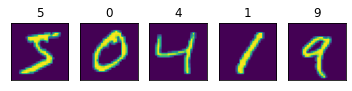

In [16]:
import matplotlib.pyplot as plt
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].values.reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)
plot_example(X, y)

In [18]:
from sklearn.metrics import accuracy_score

# Accuracy of default Scikit-learn KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_test_hat)
print(F"default KNN accuracy: {acc}")

default KNN accuracy: 0.9693571428571428


In [19]:
# predict with Implemented KNN
y_test_hat_ = []
for idx, row in X_test.iterrows():
    y_test_hat_.append(knn(row, X_train.sample(frac=0.1), y_train))

In [20]:
# Accuracy of Implemented KNN
acc = accuracy_score(y_test, y_test_hat_)
print(F"Implemented KNN accuracy: {acc}")

Implemented KNN accuracy: 0.946
